# Table of Contents
 <p>

In [1]:
%matplotlib inline
import math,sys,os,numpy as np
from numpy.random import random
from matplotlib import pyplot as plt, rcParams, animation, rc
from __future__ import print_function, division
import time

In [2]:
rc('animation', html='html5')
rcParams['figure.figsize'] = 3, 3
%precision 4
np.set_printoptions(precision=4, linewidth=100)

In [3]:
def lin(a,b,x): return a*x+b

In [52]:
a=3.
b=2.

In [53]:
n=30
x = random(n)
y = lin(a,b,x)

In [54]:
x

array([ 0.5728,  0.2553,  0.4525,  0.8962,  0.6738,  0.5097,  0.3815,  0.3072,  0.2006,  0.9389,
        0.5146,  0.2621,  0.7067,  0.9024,  0.043 ,  0.6189,  0.4994,  0.7957,  0.8576,  0.9967,
        0.977 ,  0.9077,  0.3652,  0.7798,  0.9573,  0.8448,  0.6931,  0.6868,  0.7497,  0.6975])

In [55]:
y

array([ 3.7184,  2.766 ,  3.3575,  4.6885,  4.0214,  3.529 ,  3.1446,  2.9217,  2.6017,  4.8168,
        3.5438,  2.7863,  4.1201,  4.7073,  2.1291,  3.8566,  3.4982,  4.387 ,  4.5728,  4.99  ,
        4.9309,  4.7232,  3.0957,  4.3394,  4.8718,  4.5343,  4.0793,  4.0605,  4.2492,  4.0925])

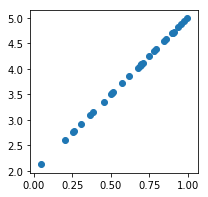

In [56]:
plt.scatter(x,y)

In [57]:
def sse(y,y_pred): return ((y-y_pred)**2).sum()
def loss(y,a,b,x): return sse(y, lin(a,b,x))
def avg_loss(y,a,b,x): return np.sqrt(loss(y,a,b,x)/n)

In [58]:
lr=0.01
# d[(y-(a*x+b))**2,b] = 2 (b + a x - y)      = 2 (y_pred - y)
# d[(y-(a*x+b))**2,a] = 2 x (b + a x - y)    = x * dy/db

In [59]:
a_guess=-1.
b_guess=1.
avg_loss(y, a_guess, b_guess, x)

3.6855

In [60]:
def update():
    global a_guess, b_guess
    y_pred = lin(a_guess, b_guess, x)
    dydb = 2 * (y_pred - y)
    dyda = x*dydb
    a_guess -= lr*dyda.mean()
    b_guess -= lr*dydb.mean()

In [61]:
fig = plt.figure(dpi=100, figsize=(5, 4))
plt.scatter(x,y)
line, = plt.plot(x,lin(a_guess,b_guess,x))
plt.close()

In [62]:
def animate(i):
    line.set_ydata(lin(a_guess,b_guess,x))
    for i in range(40): update()
    return line,

ani = animation.FuncAnimation(fig, animate, np.arange(0, 40), interval=100)
ani